In [ ]:
#Step 1: Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Step 2: Prepare the dataset
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


Label: deer


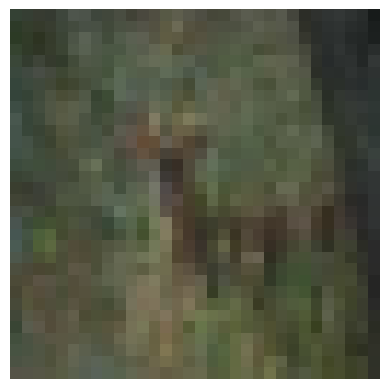

In [ ]:
# Displaying an image from from training dataset
# Function to unnormalize and display image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize (reverse normalization)
    npimg = img.numpy()  # Convert to NumPy array
    #print(npimg)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Rearrange dimensions to (H, W, C)
    plt.axis('off')  # Remove axis for clarity
    plt.show()


img, label = trainset[10]  # Access the first image in the dataset
print(f"Label: {classes[label]}")
imshow(img)


In [ ]:
print(trainset[0])

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -

In [ ]:
#Step 3: Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 -> No of input channel (like RGB), 6 -> No of output channel/filter, 5 is
        self.pool = nn.MaxPool2d(2, 2) # 2 -> The size of the window (filter) used for pooling,
                                      #2-> Stride: The step size for moving the pooling window across the input
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)#nn.Linear(in_features, out_features):16-> input channel, 5*5 is the size of feature map
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        print(x.shape)
        x = x.view(-1, 16 * 5 * 5)
        #-1 in the view() function is a special placeholder that allows PyTorch to automatically infer the size of dimension
        #Flatten input, reshapes x into a 2D tensor with shape beacuse layer in NN expect a 2D input
        #Before view(), x shape is (batch_size, 16, 5, 5), where 16 is no of channel, 5,5 is size of each feature map
        #After the view(),each image in the batch is flattened into a 1D vector of size 400.
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [ ]:
#Step 4: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#Step 5: Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)  # here forward() method will be called automatically
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Streaming output truncated to the last 5000 lines.
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Siz

In [ ]:
#Step 6: Testing the network

correct = 0
total = 0
print("size= ", len(testloader))
with torch.no_grad():
    for data in testloader:
        images, labels = data #images is a tensor of shape (4, 3, 32, 32) (4 images with 3 channels, each of size 32x32 pixels)
        outputs = net(images) #passes all 4 images (since batch size is 4) through the neural network at once.
                            # the outputs will have the shape (4, 10), where 4 corresponds to the 4 images in the batch.
                            # and 10 corresponds to the 10 class scores (logits) for each image.
                            # Each row in the outputs represents the predictions (class scores) for one image in the batch.

        _, predicted = torch.max(outputs.data, 1)  #_,ignore the first return value of the function
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Streaming output truncated to the last 5000 lines.
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 16, 5, 5])
torch.Siz

**torch.max returns a tuple:**

The first element is a tensor containing the maximum values along the specified axis.
The second element is a tensor containing the indices (the positions) of the maximum values, which corresponds to the predicted class labels.

In [ ]:
print(np.shape(predicted))

torch.Size([4])


Ground Truth: car, Predicted: deer


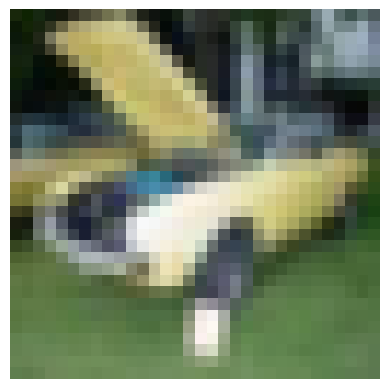

In [ ]:
# Display one image and its predicted label
print(f"Ground Truth: {classes[labels[2]]}, Predicted: {classes[predicted[2]]}")
imshow(images[2])